In [21]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras.optimizers.legacy import Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

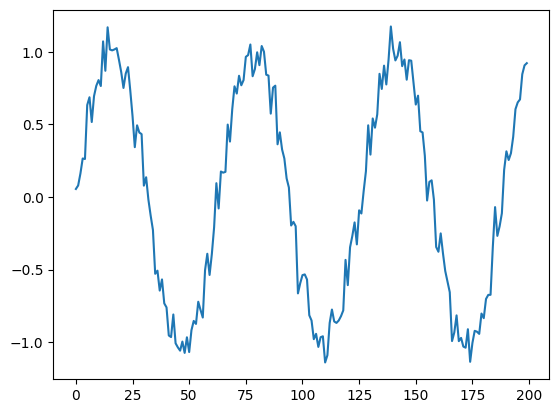

In [40]:
# Creating the original data with noise
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1

# Plotting it
plt.plot(series)
plt.show()

In [41]:
# Building the dataset
T = 10  # number of time step samples used to predict
X = []
Y = []

for t in range(len(series) - T):
    x = series[t : t + T]  # All 10 samples until the one to predict with these values
    X.append(x)
    y = series[t + T]  # The one to be predicted with the previous values
    Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)

print('X.shape', X.shape, 'Y.shape', Y.shape)

X.shape (190, 10) Y.shape (190,)


In [42]:
# Creating model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1),
)

# Training the RNN
r = model.fit(
    X[: -N // 2],
    Y[: -N // 2],
    epochs=80,
    validation_data=(
        X[-N // 2 :],
        Y[-N // 2 :],
    ),
)

Epoch 1/80
3/3 [==============================] - 0s 18ms/step - loss: 2.6723 - val_loss: 0.4727
Epoch 2/80
3/3 [==============================] - 0s 5ms/step - loss: 0.7099 - val_loss: 1.1272
Epoch 3/80
3/3 [==============================] - 0s 5ms/step - loss: 1.3079 - val_loss: 0.7740
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.7093

/Users/figredos/Developer/tensorflow-dl/.tensorflow-env/lib/python3.11/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3/3 [==============================] - 0s 5ms/step - loss: 0.4939 - val_loss: 0.2189
Epoch 5/80
3/3 [==============================] - 0s 5ms/step - loss: 0.2400 - val_loss: 0.3340
Epoch 6/80
3/3 [==============================] - 0s 6ms/step - loss: 0.4260 - val_loss: 0.2604
Epoch 7/80
3/3 [==============================] - 0s 5ms/step - loss: 0.2265 - val_loss: 0.0638
Epoch 8/80
3/3 [==============================] - 0s 5ms/step - loss: 0.0581 - val_loss: 0.1205
Epoch 9/80
3/3 [==============================] - 0s 5ms/step - loss: 0.1419 - val_loss: 0.1200
Epoch 10/80
3/3 [==============================] - 0s 5ms/step - loss: 0.1096 - val_loss: 0.0457
Epoch 11/80
3/3 [==============================] - 0s 5ms/step - loss: 0.0465 - val_loss: 0.0852
Epoch 12/80
3/3 [==============================] - 0s 5ms/step - loss: 0.0812 - val_loss: 0.1018
Epoch 13/80
3/3 [==============================] - 0s 5ms/step - loss: 0.0730 - val_loss: 0.0503
Epoch 14/80
3/3 [==============================

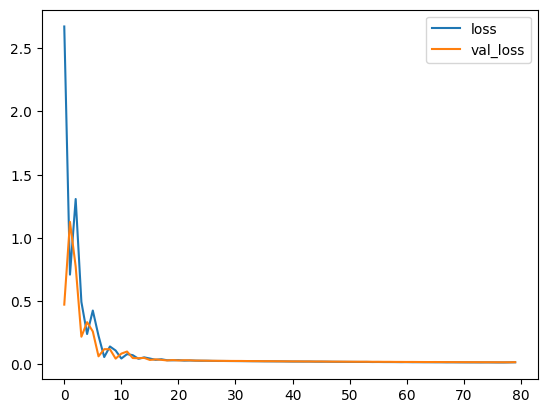

In [43]:
# Plotting loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
# Wrong forecast using true targets

validation_target_1 = Y[-N // 2 :]
validation_predictions_1 = []

# Index of first validation input
i = -N // 2

while len(validation_predictions_1) < len(validation_target_1):
    p = model.predict(X[i].reshape(1, -1))[0, 0]
    i += 1

    validation_predictions_1.append(p)

1/1 [==============================] - 0s 7ms/step


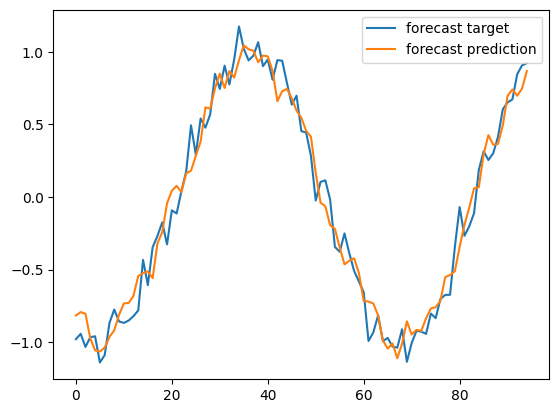

In [49]:
plt.plot(validation_target_1, label='forecast target')
plt.plot(validation_predictions_1, label='forecast prediction')
plt.legend()
plt.show()

In [ ]:
# Correct forecasting, using only the last input vector and the predictions themselves

validation_target_2 = Y[-N // 2 :]
validation_predictions_2 = []

# Last train input
last_x = X[-N // 2]

while len(validation_predictions_2) < len(validation_target_2):
    p = model.predict(last_x.reshape(1, -1))[0, 0]

    # Updating the predictions list
    validation_predictions_2.append(p)

    # make the new input by shifting the array to the left
    last_x = np.roll(last_x, -1)

    # Updating the latest prediction with our value
    last_x[-1] = p

1/1 [==============================] - 0s 15ms/step


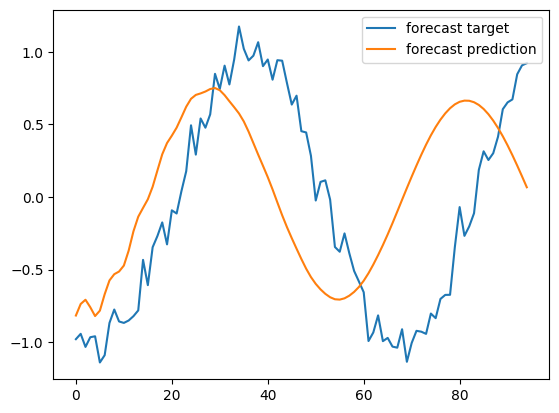

In [52]:
plt.plot(validation_target_2, label='forecast target')
plt.plot(validation_predictions_2, label='forecast prediction')
plt.legend()
plt.show()